In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [44]:
data = pd.read_csv('JM1.csv')

In [45]:
# data.rename(columns = {'c':'output'}, inplace = True) 

In [67]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [47]:
# data["defects"].replace({"True": 1, "False": 0}, inplace=True)

In [48]:
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [49]:
data.isna().count()

loc                  10885
v(g)                 10885
ev(g)                10885
iv(g)                10885
n                    10885
v                    10885
l                    10885
d                    10885
i                    10885
e                    10885
b                    10885
t                    10885
lOCode               10885
lOComment            10885
lOBlank              10885
locCodeAndComment    10885
uniq_Op              10885
uniq_Opnd            10885
total_Op             10885
total_Opnd           10885
branchCount          10885
defects              10885
dtype: int64

In [68]:
data.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op               object
uniq_Opnd             object
total_Op              object
total_Opnd            object
branchCount           object
defects                 bool
dtype: object

In [70]:
new_data = data.drop(['uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount'],axis=1)

In [72]:
new_data['defects'].value_counts()

False    8779
True     2106
Name: defects, dtype: int64

Text(0.5, 1.0, 'defects')

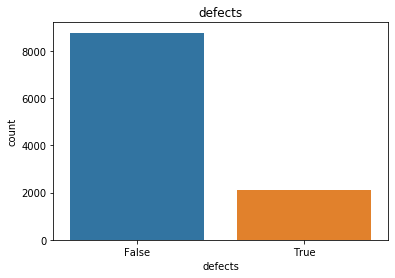

In [73]:
import seaborn as sns 
sns.countplot(new_data['defects']).set_title('defects')

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(new_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [75]:
X= new_data.drop(['defects'], axis = 1) 
Y= new_data['defects']

In [76]:
Y.head()

0    False
1     True
2     True
3     True
4     True
Name: defects, dtype: bool

In [77]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the featu

In [79]:
x_train, x_test, y_train, y_test = train_test_split(new_data.drop(["defects"], axis=1), new_data["defects"],
                                                    random_state=10, test_size=0.25)

In [80]:
x_train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
9791,5.0,1.0,1.0,1.0,10.0,31.70,0.19,5.25,6.04,166.42,0.01,9.25,3,0,0,0
3815,26.0,6.0,6.0,3.0,45.0,197.65,0.10,10.00,19.77,1976.54,0.07,109.81,19,0,4,1
2420,33.0,3.0,1.0,1.0,99.0,470.73,0.05,18.85,24.98,8871.52,0.16,492.86,27,0,4,0
4176,15.0,1.0,1.0,1.0,41.0,160.18,0.20,5.00,32.04,800.91,0.05,44.50,9,0,3,0
4283,71.0,7.0,1.0,7.0,200.0,1213.22,0.06,15.61,77.71,18941.05,0.40,1052.28,59,3,6,0


In [81]:
y_test.head()

8686     False
8453     False
10418    False
3192     False
176       True
Name: defects, dtype: bool

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [83]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
logit_pred = logit.predict(x_test)

In [85]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,134,16,150
True,503,58,561
All,637,74,711


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.76
Precision is 0.35
Recall is 0.17


In [87]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({False: 8779, True: 2106})
New dataset shape Counter({False: 8779, True: 8779})


In [88]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X))

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
logit_pred = logit.predict(X_test)

In [91]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,157,101,258
True,260,160,420
All,417,261,678


In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)
auc_logit = roc_auc_score(y_test, logit_pred)

Accuracy is 0.66
Precision is 0.70
Recall is 0.56


In [93]:
##Decision treee

In [94]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({False: 8779, True: 2106})
New dataset shape Counter({False: 8779, True: 8779})


In [95]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=28, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
dtree_pred = dtree.predict(X_test)

In [97]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,132,126,258
True,208,212,420
All,340,338,678


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)
auc_dtree = roc_auc_score(y_test, dtree_pred)

Accuracy is 0.81
Precision is 0.83
Recall is 0.79
AUC is 0.81


In [99]:
# # Create list of top most features based on importance
# feature_names = X_train.columns
# feature_imports = dtree.feature_importances_
# most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
# most_imp_features.sort_values(by="Importance", inplace=True)
# print(most_imp_features)
# plt.figure(figsize=(10,6))
# plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
# plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
# plt.xlabel('Importance')
# plt.title('Most important features - Decision Tree')
# plt.show()

In [100]:
### Random Forest

In [101]:

seed = 7

# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({False: 8779, True: 2106})
New dataset shape Counter({False: 8779, True: 8779})


In [102]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 20, max_depth=30, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
rm_prd = rm.predict(X_test)

In [104]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,139,143,282
True,244,180,424
All,383,323,706


In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)
auc_rm = roc_auc_score(y_test, rm_prd)

Accuracy is 0.86
Precision is 0.86
Recall is 0.86
AUC is 0.86


In [141]:
###adaboost

In [142]:
# Data balancing applied using SMOTE
seed = 7

from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({False: 8779, True: 2106})
New dataset shape Counter({False: 8779, True: 8779})


In [143]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 1000)

In [144]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=None)

In [145]:
ada_pred = ada.predict(X_test)

In [146]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(ada_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,150,132,282
True,263,161,424
All,413,293,706


In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, ada_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, ada_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, ada_pred)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, ada_pred)))

accuracy_ada = accuracy_score(y_test, ada_pred)
precision_ada = precision_score(y_test, ada_pred)
recall_ada = recall_score(y_test, ada_pred)
auc_ada = roc_auc_score(y_test, ada_pred)

Accuracy is 0.82
Precision is 0.87
Recall is 0.76
AUC is 0.82


In [148]:
#XGBOOST

In [149]:
seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({False: 8779, True: 2106})
New dataset shape Counter({False: 8779, True: 8779})


In [150]:
# fit model no training data
model = XGBClassifier(n_estimators = 200)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [151]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, predictions)))
print("Precision is {0:.2f}".format(precision_score(y_test, predictions)))
print("Recall is {0:.2f}".format(recall_score(y_test, predictions)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, predictions)))

accuracy_xg = accuracy_score(y_test, predictions)
precision_xg = precision_score(y_test, predictions)
recall_xg = recall_score(y_test, predictions)
auc_xg = roc_auc_score(y_test, predictions)

Accuracy is 0.87
Precision is 0.90
Recall is 0.83
AUC is 0.87


In [153]:
### Model comparision

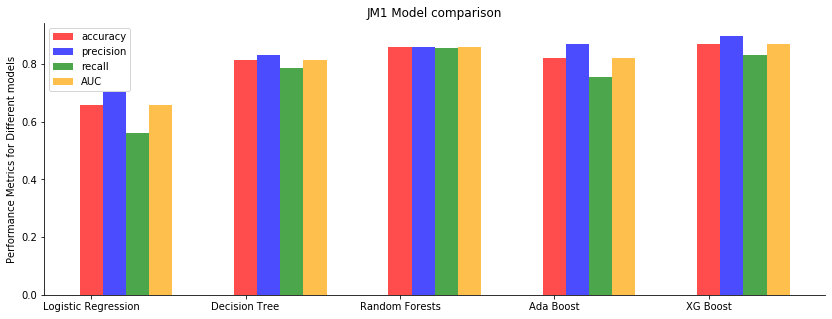

In [155]:
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [accuracy_logit, accuracy_dtree, accuracy_rm, accuracy_ada,accuracy_xg]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [precision_logit, precision_dtree, precision_rm, precision_ada,precision_xg]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [recall_logit, recall_dtree, recall_rm, recall_ada,recall_xg]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [auc_logit, auc_dtree, auc_rm, auc_ada,auc_xg]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('JM1 Model comparison')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()       